# Lecture 3: Visualization

## Announcements
* My office hours this week will be from 3 - 4 pm on Tuesday.  Next week they will be from 5 - 6 pm on Tuesday (only virtual -- use the zoom link!) You can always find out when they will be from the following link: https://calendar.google.com/calendar/b/2/r?cid=aGVhdGhlci5ncmF5QGJlcmtlbGV5LmVkdQ
* No lecture next week on Monday as its President's day

## Feedback (thanks!)
* Lists vs arrays: when to use which?
* How data is stored in the computer
* More about the % command (see later!)


### Lists vs arrays

Any computing language defines more complex data structures, which aggregate individual data into a single container. 

The simplest such data structure is an **array**, which holds a fixed number of elements of a single type, usually in a contiguous region in memory. 
Individual array elements can be indexed; first index in Python and other C-like languages is 0
Arrays can be multi-dimensional, although they are always "unrolled" into a 1d structure when they are stored in computer memory

Another sequential structure is a **list**, which is more dynamic, i.e. allows one to insert, remove, and append elements with little overhead, but is less suitable for scientific applications.

Third common structure is a **dictionary**, which is often implemented as a **hash table** (e.g. in Python) or a **tree** (e.g. in C++ STL)

#### Arrays

In [4]:
import numpy as np
b = np.array([1,2,3,4,5]) #an array
a = [1,2,3,4,5] # a list
print (b[0],b[4])
for i in b:
    print (i)
print (b)

1 5
1
2
3
4
5
[1 2 3 4 5]


In [5]:
print (len(b))   # how long is an array ? 

5


In [6]:
a = a*3
print(a)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


In [7]:
b = b*3
print(b)

[ 3  6  9 12 15]


In [8]:
m = np.ndarray(shape=(5,4),dtype=float)  # unitialized array # The N-dimensional array
print(m)
m[:,:] = 0
print(m)
m += 5   # take current values of m, increment by 5
m[1:3,2] = 10 # 1:3 means "from 1 up to but not including 3"
print(m)

[[ 6.91691904e-323  0.00000000e+000  0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000              nan]
 [-1.72723371e-077 -1.72723371e-077 -1.72723371e-077  1.73059808e-077]
 [ 2.96439388e-323  0.00000000e+000  0.00000000e+000  0.00000000e+000]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 5.  5.  5.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5. 10.  5.]
 [ 5.  5.  5.  5.]
 [ 5.  5.  5.  5.]]


More on matrix operations when we discuss linear algebra

In [9]:
v = np.array([1,2,3])
w = np.array([-3,3,-1])
print (v*w)  
print (v.dot(w))     # now we can do linear algebra !

[-3  6 -3]
0


#### Lists

Lists are also enumerable data sets, but they can accommodate mixed data types. The data are not contiguous in memory, so iterating over the lists is slower than over arrays. On the other hand, changing the size of the list is faster than the size of the array (e.g. insert or delete elements). 

In [ ]:
l = [2,4,5,'Apple']
print(l[0],l[3],len(l))
print()
for element in l:
    print (element, type(element))
    

## Data storage in python

Python is clever! We talked about how python can be dynamic in terms of data storage. We talked about floats and how the different parts of the float are stored, so let's go into a bit more detail about how integers are stored. In order to achieve this, python needs to store both the data for the integer and some extra information for the overhead.

![title](integers.png)

So here is what is actually inside an integer:

* refcnt: a reference count that helps Python silently handle memory allocation and deallocation
* type: encodes the type of the variable
* size: specifies the size of the following data members
* digit: contains the actual integer value that we expect the Python variable to represent.


### Special keywords for loops: break, continue, pass, else

#### break:

In [ ]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 6:
        break
    
print (sum, count)

#### continue:

In [ ]:
sum = 0
count = 0
while sum < 100000:
    sum += 10
    count += 1
    if count > 4 :
        continue
    print (sum)
    
print (sum, count)

#### else:

In [ ]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if count >= 60:
        break
    else:                                     # beware of indentation !!!
        print ("Finished without break")
    
    
print (sum, count)

## Outline for Lecture 2 

* Plotting with Matplotlib
    * Plotting basics review and extension
        - plot()
            - can use lists or arrays
            - format strings ('b--', 'g^', etc.)
            - automatically creates a figure if one doesn't exist
                - otherwise makes new 'axes' on active figure
        - figure()
            - used to make new figure and make existing ones active
                - e.g., figure(2) creates Figure 2, or makes Figure 2 active if it already exists.
        - subplot() and add_subplot()
            - for making subplots and adding subplots to figures
            - basic example of working with axes objects
                - (important, because most gallery examples make plots by using methods of axes objects)
                - adding plots to them
                - drawing things on them
                - getting and setting limits
        - matplotlib documentation and gallery
        
(If there's enough time)

* Input/Output
    * Reading from the prompt
    * Reading from the command line
    * File input/output
                
   

## Plotting with Matplotlib

Matplotlib provides an interface, and a set of convenient tools for graphing (2-dimensional, i.e. a graph with 2 axes, as well as 3-dimensional). The interface and appearance of the plots are deliberately made to resemble Matlab. One could argue with this aesthetic choice, but the interface makes it much easier for users used to Matlab to transition to Python (and vice versa!)

Let's look at an example

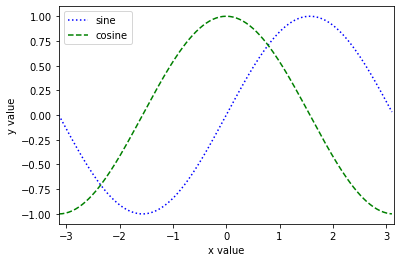

In [18]:
from pylab import * # import all functions from numpy and matplotlib. Beware ! Overloads functions like sqrt, sin

# make plots inline (so that the plots appear)
%matplotlib inline

x = arange(-pi, pi, pi/100)   # create an array of x values
plot(x, sin(x), 'b:', label='sine' )   # plot sin(x) in a blue, dotted line
plot(x, cos(x), 'g--', label='cosine' ) # plot cos(x) in a green, dashed line
xlabel('x value' )
ylabel('y value' )
xlim(-pi, pi)
#ylim(-10, 10)
legend(loc='best')
show()

Actually, plot is a very flexible command. Arguments can any sequential data types (e.g. lists), although internally they are converted into arrays. Attributes can be set on the command line or separately (see below). 

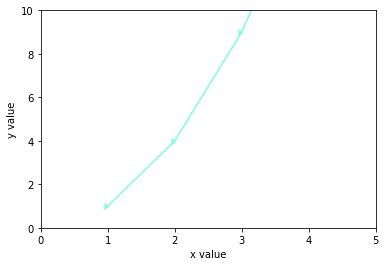

In [21]:
plot([1,2,3,4], [1,4,9,16], marker=5, color='aquamarine')
axis([0, 5, 0, 10])
xlabel('x value' )
ylabel('y value' )
show()

### Line attributes

![Line styles](linestyles.png)


### Colors

Huge range of colors in python! Here is the full table, but you can also just start with the base colors: b, g, r, c, m, y, k, w

![Colors](colors.png)

See PDF version for better resolution.

### Markers

![Filled markers](filledmarkers.png)
![Unfilled markers](unfilledmarkers.png)

See (http://matplotlib.org/) for more details

### Plots and subplots

Subplots are very useful when you want to draw more than one plot at the same time. Let's start by drawing two plots in the same cell (but things will quickly get quite a bit more complicated!)

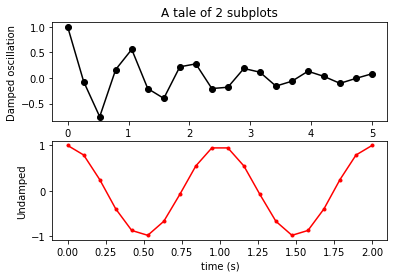

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0, 20) #what happens if I don't specify the number of points
x2 = np.linspace(0.0, 2.0, 20)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1/2)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1) # subplot(nrows, ncols, index, **kwargs)
plt.plot(x1, y1, color='black', marker='o')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

Now let's explore a few different ways to use subplots()

#### A figure and a single subplot

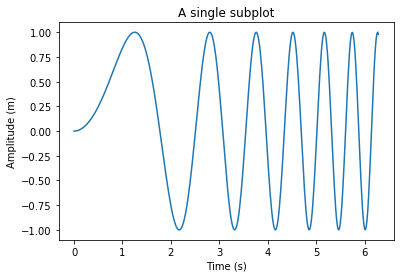

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Just a figure and one subplot
f, ax = plt.subplots() #f is the figure; a is the axis
ax.plot(x, y)
ax.set_title('A single subplot')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (m)')
plt.show()


#### Two subplots that share the x-axis

Text(0.5, 0, 'time (s)')

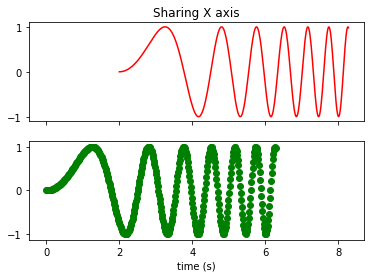

In [27]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x+2, y,'r')
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y, color='g')
axarr[1].set_xlabel('time (s)')

#### Two subplots that share the y-axis

Text(0.5, 0, 'time (s)')

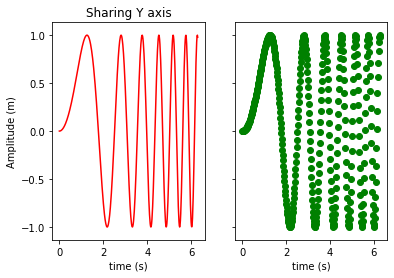

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing Y axis')
ax1.set_ylabel('Amplitude (m)')
ax1.set_xlabel('time (s)')
ax2.scatter(x, y, color='g')
ax2.set_xlabel('time (s)')

#### Three subplots sharing both x/y axes

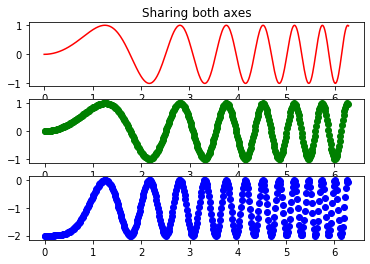

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(x, y, 'r')
ax1.set_title('Sharing both axes')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
#f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


#### Four subplots; sharing x and y axes in each row

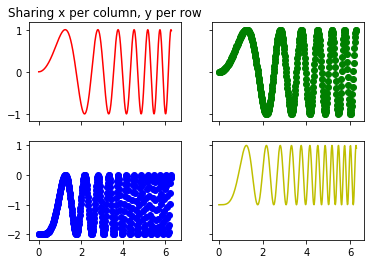

In [32]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'r')
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y, color='g')
ax3.scatter(x, 2 * y ** 2 - 2, color='b')
ax4.plot(x, 2 * y ** 2 - 1, 'y')


#### Four plots, four axes (returned as a 2-d array)

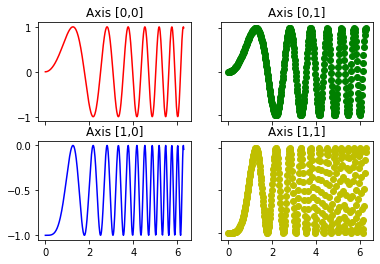

In [35]:

f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y, 'r')
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y, color='g')
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2 -1, 'b')
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2 + 3, color = 'y')
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()

For (even more!) details see the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

### Histogramming 

Histograms are different to graphs because they store the data in bins. Histograms are used extensively in data analysis. We'll see them again in the lecture on statistics.

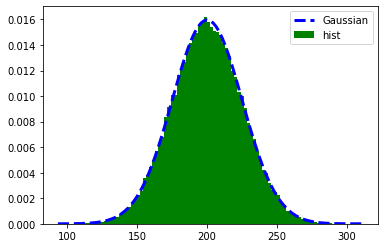

In [51]:
from pylab import *
from scipy.stats import norm # a new libary -- more advanced scientific programming

mu = 200
sigma = 25
x = mu + sigma*randn(100000)

val, bins, patches = hist(x, 100, density=True, color='g')
#print(bins)
lines = plot(bins, norm.pdf(bins, mu, sigma), 'b--',  linewidth=3)
legend([lines[0], patches[0]], ['Gaussian', 'hist'])

Now let's have a look at what the different histtype settings do.

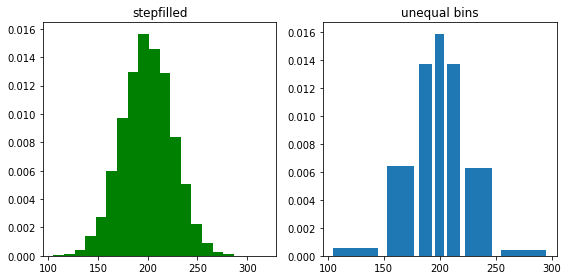

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# construct a histogram based on a Gaussian with mu=200 and sigma=25
mu = 200
sigma = 25
x = mu + sigma*np.random.randn(10000)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4)) # first the width, then the height

ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g') #stepfilled is the default
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

### For fun: 3d plotting

Does anyone know what this function is?

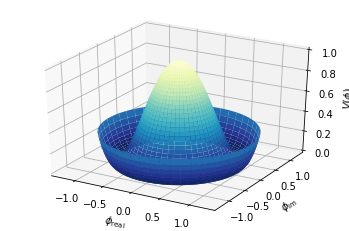

In [58]:
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

### More information
We will cover plotting in the workshops. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples" -- that's where a lot of this code has come from

## Input and Output

Most of the time, your code will need to process external data -- either entered by a human (through a keyboard), or read from external media. This is an example of *abstraction*: you write code that is stored separately from the data. 

Let's look at some basic examples

#### Keyboard prompt

In [59]:
s = input('Enter a simple arithmetic problem ')
x=eval(s)
print ("The answer to your problem,", s,", is ",x)

Enter a simple arithmetic problem 3 + 1
The answer to your problem, 3 + 1 , is  4


You may want to convert strings to numerical types in order to perform calculations. See 

In [ ]:
age = input('What is your age ? ')
print (type(age), age)
ageNumber = int(age)
print (type(ageNumber), ageNumber)
nextYear = ageNumber+1
print('Next year you will be',nextYear)

Most often, you would want to enter several values and parse them. Use string method *split()*:
But pay attention: the parsing is pretty rudimantary ! (examples)

In [1]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = s.split(',')
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))

Enter coordinates (x,y,z):5,3,5
x= 5 y= 3 z= 5
<class 'str'> <class 'str'> <class 'str'>


Sometimes you would want to convert to float or int immediately, so you can use list comprehension:

In [ ]:
s = input('Enter coordinates (x,y,z):')
[p,q,r] = [float(var) for var in (s.split(','))]
print ("x=",p,"y=",q,"z=",r)
print (type(p), type(q), type(r))
print('x squared = ',p**2)

#### Formatted output

In [4]:
for x in range(1, 11):
    print (repr(x).rjust(5), repr(x*x).rjust(1),repr(x*x*x).ljust(1))    # right justification of strings

    1 1 1
    2 4 8
    3 9 27
    4 16 64
    5 25 125
    6 36 216
    7 49 343
    8 64 512
    9 81 729
   10 100 1000


You can also zero-pad numbers, e.g. 

In [6]:
print ('-3.14'.zfill(9))

-00003.14


In [12]:
import math
s = 'pi = {0:20.20e}'.format(math.pi)
print(s)
print ('The value of PI is approximately {0:07.3f}, but you can also output more digits: {1}'.format(math.pi,math.pi))

pi = 3.14159265358979311600e+00
The value of PI is approximately 003.142, but you can also output more digits: 3.141592653589793


The format command in python is pretty powerful. Have a look [here](https://docs.python.org/3/library/string.html) to see everything it can do.

In the first lecture we discussed binary as a different representation compared to decimal. There's another one, called hexadecimal, which uses base 16. 

In [13]:
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x{0:x}'.format(i))

Enter integer: 17
The hex representation of the integer is 0x11


For those of you familiar with C (and its *sprintf()* function), you can use old-style formatting in python (if you want):

In [ ]:
print ('The value of PI is approximately %7.3e.' % math.pi)
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x%x' % i)

### Reading and writing files

Very often you will want to read a large dataset, and would want to read it from an external medium (rather than typing it by hand into your jupyter notebook!). The simplest case is a file on your local disk. Use *open()* function. It returns a file object, and is most commonly used with two arguments: *open(filenamne,mode)*:

In [14]:
%ls

Lecture03.ipynb      filledmarkers.png    linestyles.png
colors.png           integers.png         unfilledmarkers.png


In [18]:
f = open('test3.txt', 'w')
print (f)
f.write('Write a line\n')
f.write('Write another line\n')
f.write('Write a number here: ')
f.write(repr(1))
f.write('more and more and more')
f.write('print this line please \n')
f.write('\n')   # end line (good practice)
#f.close()

%ls

%cat test3.txt

<_io.TextIOWrapper name='test3.txt' mode='w' encoding='UTF-8'>
Lecture03.ipynb      integers.png         unfilledmarkers.png
colors.png           linestyles.png
filledmarkers.png    test3.txt
Write a line
Write another line
Write a number here: 1more and more and moreprint this line please 



In [19]:
f.write('some more\n')
f.close()

Most commonly, you would want to write columns of data:

In [20]:
import numpy as np
f = open('test.txt', 'w')
for x in np.arange(0,10,0.1):
    f.write('{0:f}\t {1:f}\t {2:f}\n'.format(x,x**2,-x**3))
f.close()

%cat test.txt

0.000000	 0.000000	 -0.000000
0.100000	 0.010000	 -0.001000
0.200000	 0.040000	 -0.008000
0.300000	 0.090000	 -0.027000
0.400000	 0.160000	 -0.064000
0.500000	 0.250000	 -0.125000
0.600000	 0.360000	 -0.216000
0.700000	 0.490000	 -0.343000
0.800000	 0.640000	 -0.512000
0.900000	 0.810000	 -0.729000
1.000000	 1.000000	 -1.000000
1.100000	 1.210000	 -1.331000
1.200000	 1.440000	 -1.728000
1.300000	 1.690000	 -2.197000
1.400000	 1.960000	 -2.744000
1.500000	 2.250000	 -3.375000
1.600000	 2.560000	 -4.096000
1.700000	 2.890000	 -4.913000
1.800000	 3.240000	 -5.832000
1.900000	 3.610000	 -6.859000
2.000000	 4.000000	 -8.000000
2.100000	 4.410000	 -9.261000
2.200000	 4.840000	 -10.648000
2.300000	 5.290000	 -12.167000
2.400000	 5.760000	 -13.824000
2.500000	 6.250000	 -15.625000
2.600000	 6.760000	 -17.576000
2.700000	 7.290000	 -19.683000
2.800000	 7.840000	 -21.952000
2.900000	 8.410000	 -24.389000
3.000000	 9.000000	 -27.000000
3.100000	 9.610000	 -29.791000
3.200000	 10.240000	 -32.76800

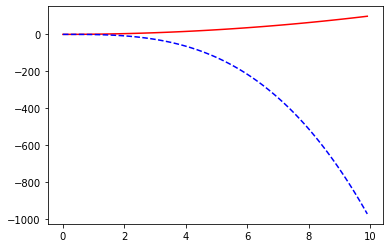

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x, x2, x3 = np.loadtxt('test.txt', unpack = True)
#print(x,x2,x3)
plt.plot(x,x2,'r-',x,x3,'b--')
plt.show()

There is also a more direct, less polished interface for reading data from a file:

In [ ]:
f = open('test.txt', 'r')    # open file for reading
#f.write('Try me\n')
s = f.readline()             # read one line (including end-of-line character, '\n')
print (s)                      # print it

In [ ]:
s2 = f.readline()            # this will now read the second line
print (s2)

In [ ]:
f = open('test.txt', 'rb') # opening the file again will reset the handle to the beginning of the file.NB: binary mode !
f.seek(5)                  # skip 5 bytes (5 characters)
s2 = f.readline()          # read from that point until the end of the line
print (s2)                 # notice trancation 
f.seek(-10, 1)             # go back 10 bytes from the current position (i.e. beginning of next line)
s2 = f.readline()          # notice what is read
print (s2)
f.seek?